In [382]:

import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import time
import sys



sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [383]:
df_uber = pd.read_csv(r'C:\Users\mashael\Desktop/uber_nyc_data.csv')

In [384]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1048575 non-null  int64  
 1   origin_taz       1048575 non-null  object 
 2   destination_taz  1001011 non-null  object 
 3   pickup_datetime  1048575 non-null  object 
 4   trip_distance    1048575 non-null  float64
 5   trip_duration    1048575 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 48.0+ MB


In [385]:
df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,9/1/2014 9:00,4.2500,0:15:11
1,252582,7B,15,9/1/2014 18:00,10.1700,0:34:05
2,252583,11,2A,9/1/2014 17:00,4.0200,0:17:06
3,252584,3B,4A,9/1/2014 13:00,1.4600,0:06:32
4,252585,2A,10,9/1/2014 14:00,8.3100,0:26:17


# Check for missing data


In [386]:
df_uber.isnull().sum()

id                     0
origin_taz             0
destination_taz    47564
pickup_datetime        0
trip_distance          0
trip_duration          0
dtype: int64

In [387]:
#uniqe value
a = df_uber.origin_taz.unique() #28 unique origin
a

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [388]:
a2 = df_uber.destination_taz.unique() #30 unique destination , same as origin except for nan and 18.
a2

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In [389]:
#Check some of the data with missing destination. 
df_uber[df_uber.destination_taz.isnull()].head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,9/1/2014 17:00,11.6700,0:23:45
32,252613,9,NaN,9/1/2014 16:00,80.6900,1:59:37
63,252644,9,NaN,9/1/2014 18:00,23.0700,1:03:37
141,252722,9,NaN,9/1/2014 10:00,21.7300,0:41:12
148,252729,4B,NaN,9/1/2014 10:00,4.6200,0:14:55


In [390]:
#Checking for null values
df_uber['destination_taz'] = df_uber['destination_taz'].replace(np.nan, 0)

In [391]:
df_uber.isnull().sum()

id                 0
origin_taz         0
destination_taz    0
pickup_datetime    0
trip_distance      0
trip_duration      0
dtype: int64

#  add some useful columns

In [392]:
df_uber['pickup_datetime']=pd.to_datetime(df_uber['pickup_datetime'],format='%m/%d/%Y %H:%M')

In [393]:
df_uber.head(10)

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.2500,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.1700,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.0200,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.4600,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.3100,0:26:17
5,252586,5B,4C,2014-09-01 12:00:00,1.0400,0:08:35
6,252587,10,10,2014-09-01 14:00:00,1.4400,0:19:36
7,252588,2A,7A,2014-09-01 03:00:00,5.0800,0:18:17
8,252589,2B,3C,2014-09-01 11:00:00,1.6400,0:07:29
9,252590,9,5B,2014-09-01 20:00:00,16.6300,0:28:37


In [394]:
df_uber.tail(10)

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
1048565,21539380,11,6B,2014-09-30 22:00:00,4.4300,0:13:48
1048566,21539387,4C,0,2014-09-30 22:00:00,15.9100,0:34:19
1048567,21539389,6A,0,2014-09-30 22:00:00,17.3900,0:38:51
1048568,21539404,12,10,2014-09-30 22:00:00,9.1400,0:39:43
1048569,21539421,4C,0,2014-09-30 23:00:00,19.2100,0:33:39
1048570,21539424,4C,4A,2014-09-30 21:00:00,1.7500,0:10:56
1048571,21539434,8,5A,2014-09-30 23:00:00,8.8600,0:21:01
1048572,21539437,2A,10,2014-09-30 21:00:00,5.9800,0:23:36
1048573,21539446,2A,4A,2014-09-30 22:00:00,1.0400,0:05:48
1048574,21539453,6B,6B,2014-09-30 21:00:00,0.0000,0:03:01


In [395]:
# add  more suitable columns
df_uber['date']=df_uber['pickup_datetime'].dt.day
df_uber['weekday']=df_uber['pickup_datetime'].dt.day_name()
df_uber['hour']=df_uber['pickup_datetime'].dt.hour
df_uber['min']=df_uber['pickup_datetime'].dt.minute
df_uber['weekno']=df_uber['pickup_datetime'].dt.weekofyear - 13

In [396]:
df_uber.head(10)


,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,date,weekday,hour,min,weekno
0,252581,7C,6A,2014-09-01 09:00:00,4.2500,0:15:11,1,Monday,9,0,23
1,252582,7B,15,2014-09-01 18:00:00,10.1700,0:34:05,1,Monday,18,0,23
2,252583,11,2A,2014-09-01 17:00:00,4.0200,0:17:06,1,Monday,17,0,23
3,252584,3B,4A,2014-09-01 13:00:00,1.4600,0:06:32,1,Monday,13,0,23
4,252585,2A,10,2014-09-01 14:00:00,8.3100,0:26:17,1,Monday,14,0,23
5,252586,5B,4C,2014-09-01 12:00:00,1.0400,0:08:35,1,Monday,12,0,23
6,252587,10,10,2014-09-01 14:00:00,1.4400,0:19:36,1,Monday,14,0,23
7,252588,2A,7A,2014-09-01 03:00:00,5.0800,0:18:17,1,Monday,3,0,23
8,252589,2B,3C,2014-09-01 11:00:00,1.6400,0:07:29,1,Monday,11,0,23
9,252590,9,5B,2014-09-01 20:00:00,16.6300,0:28:37,1,Monday,20,0,23


In [397]:
df_uber.tail(10)

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,date,weekday,hour,min,weekno
1048565,21539380,11,6B,2014-09-30 22:00:00,4.4300,0:13:48,30,Tuesday,22,0,27
1048566,21539387,4C,0,2014-09-30 22:00:00,15.9100,0:34:19,30,Tuesday,22,0,27
1048567,21539389,6A,0,2014-09-30 22:00:00,17.3900,0:38:51,30,Tuesday,22,0,27
1048568,21539404,12,10,2014-09-30 22:00:00,9.1400,0:39:43,30,Tuesday,22,0,27
1048569,21539421,4C,0,2014-09-30 23:00:00,19.2100,0:33:39,30,Tuesday,23,0,27
1048570,21539424,4C,4A,2014-09-30 21:00:00,1.7500,0:10:56,30,Tuesday,21,0,27
1048571,21539434,8,5A,2014-09-30 23:00:00,8.8600,0:21:01,30,Tuesday,23,0,27
1048572,21539437,2A,10,2014-09-30 21:00:00,5.9800,0:23:36,30,Tuesday,21,0,27
1048573,21539446,2A,4A,2014-09-30 22:00:00,1.0400,0:05:48,30,Tuesday,22,0,27
1048574,21539453,6B,6B,2014-09-30 21:00:00,0.0000,0:03:01,30,Tuesday,21,0,27


# Analyzing Data

1. The effect of time on demand for Uber rides: distribution per hour, day, and weekday.

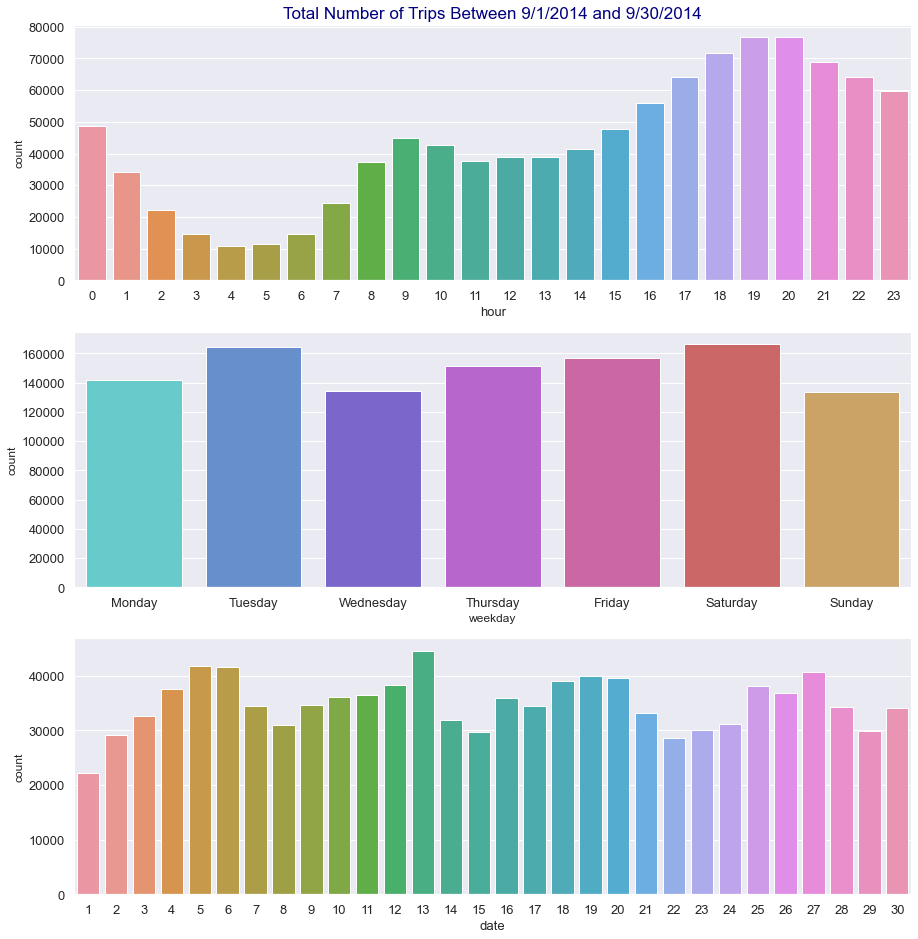

In [398]:
# Create plots comparing demand per different time categories:
fig = plt.figure(figsize = (15,16))

plt.subplot(3,1,1) 
ax1 = sns.countplot(df_uber.hour, order = range(24))
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Between 9/1/2014 and 9/30/2014', fontsize=17, color='navy')
plt.xlabel('hour', fontsize=13)


plt.subplot(3,1,3) 
ax3 = sns.countplot(df_uber.date)
plt.tick_params(labelsize=13)
plt.xlabel('date',fontsize=13)


plt.subplot(3,1,2)
ax2 = sns.countplot(df_uber.weekday)
plt.tick_params(labelsize=13)
plt.xlabel('weekday')


plt.show()

2. Weekends vs Weekdays : Difference in average number of pickups on weekdays and weekends

In [399]:
week_day['day_type']=['wd','wd','wd','wd','we','wd','we']

In [400]:
week_day

,weekday,day_type
Saturday,41661.0000,wd
Tuesday,41022.7500,wd
Friday,39231.2500,wd
Thursday,37782.5000,wd
Monday,35376.5000,we
Wednesday,33620.7500,wd
Sunday,33449.0000,we


In [401]:
pie=week_day.groupby('day_type').sum()
pie.iloc[0,0]=pie.iloc[0,0]/5
pie.iloc[1,0]=pie.iloc[1,0]/2
pie

,weekday
day_type,
wd,38663.6500
we,34412.7500


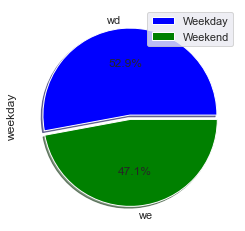

In [402]:
explode=[0,0.05]
colors=['blue','green']
labels=['Weekday','Weekend']
pie.plot.pie(autopct = '%1.1f%%',shadow=True,subplots=True,
        colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()